# Masses and volumes

This example notebook shows how electrode and separator densities can be calculated top-down or bottom from different inputs.

In [1]:
# %pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
# !pip install git+https://github.com/pybamm-team/pybamm-tea.git # install PyBaMM-TEA if it is not installed
import pybamm
import pybamm_tea
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from PIL import Image
import io
from IPython.display import Image as IPyImage, display

The quickest way to create a TEA class is to start with a PyBaMM parameter-set and add/update values with an input parameter-set.

For the masses and volumes, there is plot and a dataframe, which is shown below.

C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:215: UserWarning: 'Negative electrode active material density [kg.m-3]' and 'Negative electrode dry density [kg.m-3]' have been calculated from; 'Electrolyte density [kg.m-3]', 'Negative electrode porosity' and 'Negative electrode density [kg.m-3]'
  warnings.warn(
C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:215: UserWarning: 'Positive electrode active material density [kg.m-3]' and 'Positive electrode dry density [kg.m-3]' have been calculated from; 'Electrolyte density [kg.m-3]', 'Positive electrode porosity' and 'Positive electrode density [kg.m-3]'
  warnings.warn(


,Volume loading [uL.cm-2],Mass loading [mg.cm-2],Density [mg.uL-1]
Negative electrode electrolyte,2.1300,2.717880,1.276000
Negative electrode active material,6.3900,11.399760,1.784000
Negative electrode inactive material,0.0000,0.000000,0.000000
Negative electrode dry,8.5200,11.399760,1.338000
Negative electrode,8.5200,14.117640,1.657000
Positive electrode electrolyte,2.5326,3.231598,1.276000
Positive electrode active material,5.0274,21.429122,4.262466
Positive electrode inactive material,0.0000,0.000000,0.000000
Positive electrode dry,7.5600,21.429122,2.834540
Positive electrode,7.5600,24.660720,3.262000


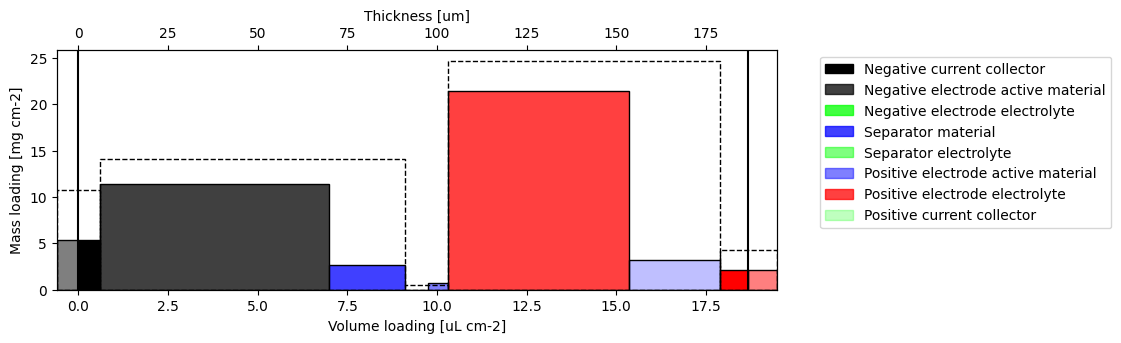

In [2]:
# input parameter-set
input = {
    "Electrolyte density [kg.m-3]": 1276,
    #"Electrolyte volume per total pore volume": 1.2,
    'Loss of lithium inventory [mA.h.cm-2]': 0.1,
    #'Loss of lithium inventory [%]': 1.0,
    'Loss of positive electrode active material [%]': 0,
    'Positive electrode stoichiometry at LAM': 0,
    'Loss of negative electrode active material [%]': 0,
    'Negative electrode stoichiometry at LAM': 0,
}

# base parameter-sets
base = pybamm.ParameterValues("Chen2020")

# create a TEA class
tea_class = pybamm_tea.TEA(base, input)

# plot the mass and volume loadings
tea_class.plot_masses_and_volumes(show_plot=False)

# get the mass and volume loadings as a dataframe
tea_class.masses_and_volumes_dataframe


### Separator density calculation

In the dataframe we can see the volume- and mass loadings, as well as the densities of different components and domains. The loadings and densites can be calculated from many inputs, in this case the separator density was calculated top-down as the remainder from the _parameter-set-_ separator density and the _input_ electrolyte density with respect to the volume fractions.

\begin{equation*}
\rho_{\text {separator material}}=\frac{\rho_{\text {separator }}-\varepsilon_{}\rho_{\text {electrolyte }}}{v_{\text {separator material}}}
\end{equation*}

In this specific example case, the value for the (wet) separator density gives the value of the dry separator density, which leads to the negative separator material density, similarly also inactive material densities can become negative with the top-down calculation. Another special case of this parameter-set is that there are no inactive materials considered explicitly, so that no active material densities need to be provided, as they can be calculated from the dry electrode densities. If inactive materials are added, also densities for active or inactive materials need to be supplied. 

Let's update the separator density. The separator density can directly be inputted, but also be updated based on the dry separator density or the separator material density as input (if one of both is supplied and the other not). If both dry separator density and separator material density are supplied, the separator porosity is updated.

,Volume loading [uL.cm-2],Mass loading [mg.cm-2],Density [mg.uL-1]
Negative electrode electrolyte,2.1300,2.717880,1.276000
Negative electrode active material,6.3900,11.399760,1.784000
Negative electrode inactive material,0.0000,0.000000,0.000000
Negative electrode dry,8.5200,11.399760,1.338000
Negative electrode,8.5200,14.117640,1.657000
Positive electrode electrolyte,2.5326,3.231598,1.276000
Positive electrode active material,5.0274,21.429122,4.262466
Positive electrode inactive material,0.0000,0.000000,0.000000
Positive electrode dry,7.5600,21.429122,2.834540
Positive electrode,7.5600,24.660720,3.262000


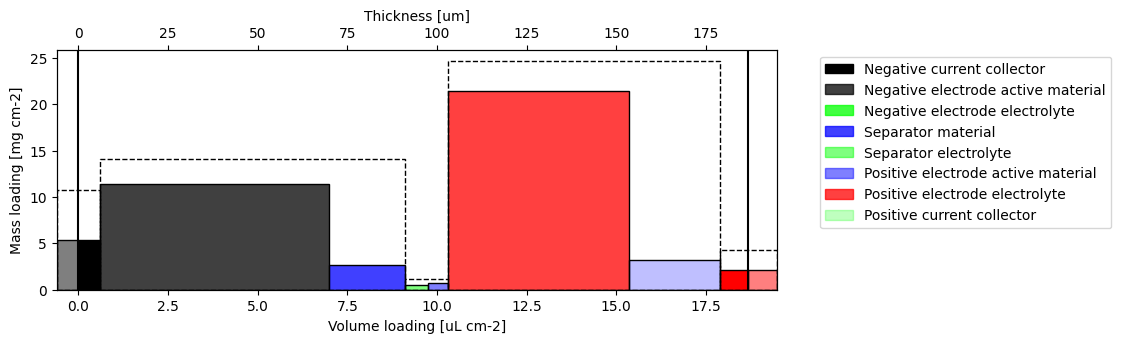

In [3]:
input["Separator dry density [kg.m-3]"] = pybamm.ParameterValues("Chen2020").get("Separator density [kg.m-3]")
tea_class = pybamm_tea.TEA(base, input)
tea_class.plot_masses_and_volumes()
tea_class.masses_and_volumes_dataframe

### Electrode density calculation

For the electrode density calculation, more flexibility with the input is possible - there are five options;

1. The simplist way for adding inactive materials is to provide an inactive material density and dry electrode mass fraction. Based on those, the electrode density and the active material volume fraction are updated.

\begin{equation*}
\begin{aligned}
& v_{\text {active }}=(1-\varepsilon) \frac{\frac{w_{\text {active }}}{\rho_{\text {active }}}}{\frac{w_{\text {active }}}{\rho_{\text {active }}}+\frac{1-w_{\text {active }}}{\rho_{\text {inactive }}}} \\
& \rho_{\text {dry electrode }}=v_{\text {active }} \rho_{\text {active }}+\left(1-v_{\text {active }}-\varepsilon\right) \rho_{\text {inactive }} \\
& \rho_{\text {electrode }}=\rho_{\text {dry electrode }}+\varepsilon \rho_{\text {electrolyte }}
\end{aligned}
\end{equation*}

2. The inactive materials can also be splitted into binder and conductive additive. If the dry electrode mass fractions and densities for both are supplied, the inactive material mass fraction and density is calculated from them.

\begin{equation*}
\begin{aligned}
& w_{\text {inactive }}=w_{\text {conductive }}+w_{\text {binder }} \\
& \rho_{\text {inactive }}=\frac{w_{\text {inactive }}}{\frac{w_{\text {conductive }}}{\rho_{\text {conductive }}}+\frac{w_{\text {binder }}}{\rho_{\text {binder }}}} \\
& w_{\text {active }}=1-w_{\text {conductive }}+w_{\text {binder }}
\end{aligned}
\end{equation*}

3. Despite that, one can also input the dry electrode density and active material density together with the active material dry mass fraction to calculate the inactive material density.

\begin{equation*}
\rho_{\text {inactive }}=\frac{1 - w_{\text {active }}}{\frac{1-\varepsilon}{\rho_{\text {dry electrode }}}-\frac{w_{\text {active }}}{\rho_{\text {active }}}}
\end{equation*}

4. Like 3, but with the inactive material density as input and the active material density as output.

5. Finally, if one adds both active and inactive material density on top of the dry electrode density and active material dry mass fraction, the porosity can be estimated based on the material densities. The material densities can be divided by an estimated relative volume expansion, but for various reasons the actual porosity might be lower than the theoretically calculated one below.

\begin{equation*}
\varepsilon=1-\rho_{\text {dry electrode }}\left(\frac{w_{\text {active }}}{\rho_{\text {active }}}+\frac{w_{\text {inactive }}}{\rho_{\text {inactive }}}\right)
\end{equation*}

A short summary:

\begin{aligned}
& w_{\text {conductive }}, \rho_{\text {conductive }}, w_{\text {binder }}, \rho_{\text {binder }} \quad \rightarrow \quad \rho_{\text {inactive }}, w_{\text {active }} \\
& w_{\text {active }}+\text { two of } ( \rho_{\text {active }}, \rho_{\text {inactive }}, \rho_{\text {dry electrode }} ) \rightarrow v_{\text {active }}, \rho_{\text {electrode }}, \rho_x \\
& w_{\text {active }}, \rho_{\text {active }}, \rho_{\text {inactive }}, \rho_{\text {dry electrode }} \quad \rightarrow v_{\text {active }}, \rho_{\text {electrode }}, \varepsilon \\
&
\end{aligned}

For the active material density we consider crystal densities and optionally divide them by a relative volume expansion.

,Volume loading [uL.cm-2],Mass loading [mg.cm-2],Density [mg.uL-1]_1&2,Density [mg.uL-1]_3&5
Negative electrode electrolyte,2.130000,2.717880,1.276000,1.276000
Negative electrode active material,5.915717,12.186376,2.060000,2.266000
Negative electrode inactive material,0.474283,0.641388,1.352332,1.352332
Negative electrode dry,8.520000,12.827765,1.505606,1.505606
Negative electrode,8.520000,15.545645,1.824606,1.905149
Positive electrode electrolyte,2.532600,3.231598,1.276000,1.276000
Positive electrode active material,4.414302,20.967937,4.750000,4.750000
Positive electrode inactive material,0.613098,1.103576,1.800000,1.800000
Positive electrode dry,7.560000,22.071512,2.919512,2.919512
Positive electrode,7.560000,25.303110,3.346972,3.346972


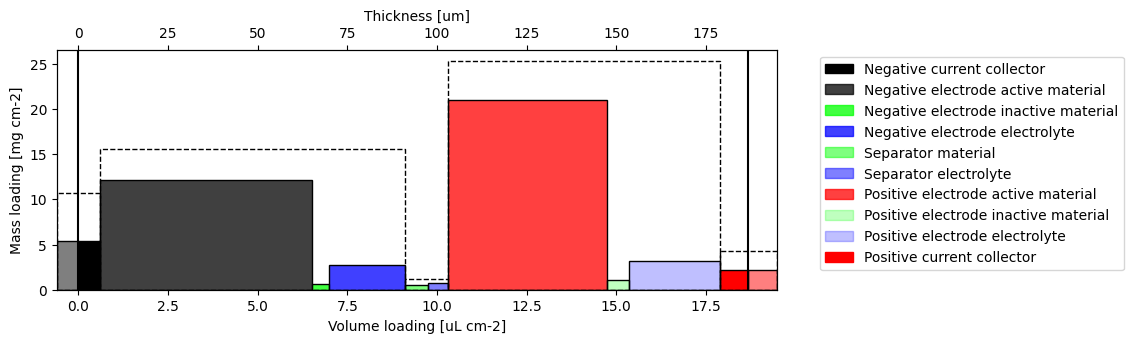

In [4]:
# create an input parameter-set considering "inactive material density"
electrode_1 = {
    "Positive electrode inactive material density [kg.m-3]": 1800, # PVdF and CB
    "Positive electrode active material dry mass fraction": 0.95,
    "Positive electrode active material density [kg.m-3]": 4750, # NMC
}
# create an input parameter-set to calculate the inactive material density from conductive additive- and binder densities
electrode_2 = {
    "Negative electrode binder density [kg.m-3]": (2 * 940 + 1600) / 3, # 2:1 (volume) CMC:SBR
    "Negative electrode conductive additive density [kg.m-3]": 1800, # CB
    "Negative electrode binder dry mass fraction": 0.03,
    "Negative electrode conductive additive dry mass fraction": 0.02,
    "Negative electrode active material density [kg.m-3]": 2266/1.1, # Graphite
}

# copy input and update with new parameters
inputs_1_2 = input.copy()
inputs_1_2.update(electrode_1)
inputs_1_2.update(electrode_2)

# create a TEA class
tea_class_1_2 = pybamm_tea.TEA(base, inputs_1_2)
tea_class_1_2.plot_masses_and_volumes()

# create an input parameter-set to calculate the inactive material density from the dry electrode density and active material density
electrode_3 = {
    "Positive electrode dry density [kg.m-3]": tea_class_1_2.parameter_values.get("Positive electrode dry density [kg.m-3]"),
    "Positive electrode active material dry mass fraction": 0.95,
    "Positive electrode active material density [kg.m-3]": 4750,
}
# create an input parameter-set to calculate the porosity from the dry electrode-, active- and inactive material density
electrode_5 = {
    "Negative electrode dry density [kg.m-3]": tea_class_1_2.parameter_values.get("Negative electrode dry density [kg.m-3]"),
    "Negative electrode active material dry mass fraction": 0.95,
    "Negative electrode active material density [kg.m-3]": 2266,
    "Negative electrode inactive material density [kg.m-3]": tea_class_1_2.parameter_values.get("Negative electrode inactive material density [kg.m-3]"),
}

# copy input and update with new parameters
inputs_3_5 = input.copy()
inputs_3_5.update(electrode_3)
inputs_3_5.update(electrode_5)

# create a TEA class
tea_class_3_5 = pybamm_tea.TEA(base, inputs_3_5)

# join the dataframes on the index
masses_and_volumes = tea_class_1_2.masses_and_volumes_dataframe.join(tea_class_3_5.masses_and_volumes_dataframe['Density [mg.uL-1]'], lsuffix='_1&2', rsuffix='_3&5')

# display the joined dataframe
display(masses_and_volumes)

### Energy per weight and volume of the electrode stack.

At the stack level, the volumetric _stack_ energy can be calculated from the areal capacity, the average OCP and the (single-)stack thickness, as below:

\begin{equation*}
E_{\text {stack }}^{\text {volumetric }}=\frac{q_{\text {area }}\bar{U}}{\frac{d_{c c}^{-}}{2}+d_{-}+d_{\text {sep}}+d_{+}+\frac{d_{c c}^{+}}{2}}
\end{equation*}

The gravimetric energy density is calculated by dividing the volumetric energy with the stack density. The stack density is the sum of the relative domain thicknesses multiplied by the domain densities. One should note that there are no other additional masses and volumes considered yet, as from excess electrolyte or housing. The energy metrics and a few other metrics can be found in the _stack_energy_dataframe_.

In [5]:
# display stack energy dataframe
display(tea_class.stack_energy_dataframe)

,Parameter,Unit,Value
0,Volumetric stack energy,W.h.L-1,979.043997
1,Gravimetric stack energy,W.h.kg-1,384.937458
2,Areal stack energy,W.h.m-2,182.885419
3,Stack average OCP,V,3.717509
4,Capacity,mA.h.cm-2,4.919568
5,Stack density,kg.L-1,2.543385
6,Single stack thickness,um,186.800000


### Excess electrolyte
There is no excess electrolyte considered within the stack-level calculations, but there is already a dataframe with electrolyte metrics. All of the included metrics are also possible input parameter and update each other, however excess electrolyte weight and volume will first be considered at the cell level.

In [6]:
tea_class.electrolyte_dataframe

,Parameter,Unit,Value
0,Electrolyte volume per total pore volume,-,1.000000
1,Electrolyte volume per unit area,uL.cm-2,5.226600
2,Electrolyte volume per capacity,uL.mA.h-1,1.062410
3,Electrolyte volume per negative electrode acti...,uL.mg-1,0.493624
4,Electrolyte volume per positive electrode acti...,uL.mg-1,0.318707


### Expansion during cycling

Congrats, that's pretty much it about densities. Below a GIF is created in which a dense metal electrode expands during charge and the positive active material density reduces.
Thereby the negative electrode thickness is increased with the extracted lithium from the positive electrode and the extracted lithium mass is subtracted from the mass of the positve active material, while assuming its volume remains constant.

\begin{equation*}
t_{\text {lithiated }}^{-}=\frac{\left(y_-y_{100}\right) n_{\text {th. max }}^{+} M_{L i}}{F \rho_{L i}}
\end{equation*}

\begin{equation*}
\rho_{\text {active, delithiated }}^{+}=\rho_{\text {active, lithiated }}^{+}-M_{L i} C_{\max }^{+}\left(y_{initial}-y_{100}\right)
\end{equation*}

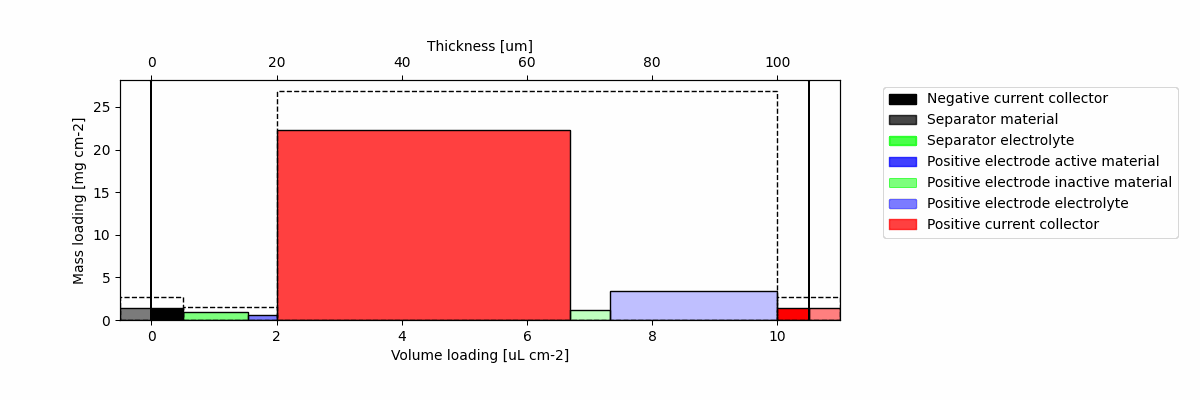

In [7]:
# initialize list for gif images
image_list = []

# set min/max stoichiometries
y100 = 0.3
y0 = 0.85

# input 
input_lithium = {
    # Negative electrode
    "Negative electrode thickness [m]": 0.0001,
    "Negative electrode active material volume fraction": 1,
    "Negative electrode porosity": 0,
    "Negative electrode active material density [kg.m-3]": 534,
    "Negative electrode OCP [V]": 0,
    "Maximum concentration in negative electrode [mol.m-3]": 1e1000,
    "Initial concentration in negative electrode [mol.m-3]": 0,
    # Positive electrode
    "Positive electrode porosity": 1/3,
    "Positive electrode thickness [m]": 80 * 1e-6,
    "Positive electrode active material dry mass fraction": 0.95,
    "Positive electrode active material density [kg.m-3]": 4750, # NMC
    "Positive electrode inactive material density [kg.m-3]": 1800, # PVdF and CB
    "Maximum concentration in positive electrode [mol.m-3]": tea_class.parameter_values.get("Maximum concentration in positive electrode [mol.m-3]"),
    "Initial concentration in positive electrode [mol.m-3]": tea_class.parameter_values.get("Maximum concentration in positive electrode [mol.m-3]") * tea_class.parameter_values.get("Positive electrode initial stoichiometry"),
    "Positive electrode stoichiometry at 100% SoC": y100,
    "Positive electrode stoichiometry at 0% SoC": y0,
    "Positive electrode OCP [V]": pybamm.ParameterValues("Chen2020").get("Positive electrode OCP [V]"),
    # Other inputs
    "Electrolyte density [kg.m-3]": 1276,
    "Negative current collector density [kg.m-3]": 2700,
    "Positive current collector density [kg.m-3]": 2700,
    "Negative current collector thickness [m]": 10e-6,
    "Positive current collector thickness [m]": 10e-6,
    "Separator density [kg.m-3]": 1000,
    "Separator porosity": 0.3,
    "Separator thickness [m]": 15e-6,
    "Electrode height [m]": 1,
    "Electrode width [m]": 1,
    'Ambient temperature [K]': 298.15,
    'Reference temperature [K]': 298.15,
    'Positive electrode OCP entropic change [V.K-1]': 0,
    'Negative electrode OCP entropic change [V.K-1]': 0,
}

soc = np.linspace(0, 1, 101)
y_ = y0 - soc * (y0 - y100)
rho_init = input_lithium["Positive electrode active material density [kg.m-3]"]
c_max = input_lithium["Maximum concentration in positive electrode [mol.m-3]"]

for y in y_:
    # calculate transferred lithium and update input
    n_li_max = pybamm_tea.TEA(input_lithium).stack_energy.get("Positive electrode theoretical capacity [mA.h.cm-2]")
    input_lithium.update({"Negative electrode thickness [m]": n_li_max * (y0 - y) * 6.941 / 0.534 / 96485 * 3.6 / 100})
    input_lithium.update({"Positive electrode active material density [kg.m-3]": rho_init - 0.006941 * c_max * (y0 - y)})
    
    # create a TEA class and plot the masses and volumes
    tea_class_lithium = pybamm_tea.TEA(input_lithium)
    tea_class_lithium.plot_masses_and_volumes()
    
    # Save the plot to a buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    
    # Append the image to the list
    image = Image.open(buf)
    image_list.append(image)
    
    # Clear the figure for the next iteration
    plt.clf()
    plt.close("all")
    
# Create a GIF
image_list[0].save('output.gif', save_all=True, append_images=image_list[1:], duration=100, loop=0)

# Display the GIF in a notebook
display(IPyImage(filename="output.gif"))